<a href="https://colab.research.google.com/github/VisnuRitesh/letter-classifier/blob/main/Tamil_Handwritten_Text_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the dataset

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Importing the libraries

In [3]:
!pip install -Uqq fastbook
from fastbook import *

     |████████████████████████████████| 727kB 10.5MB/s 
     |████████████████████████████████| 1.2MB 17.1MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
     |████████████████████████████████| 194kB 53.5MB/s 
     |████████████████████████████████| 61kB 10.7MB/s 


In [ ]:
!unzip /content/gdrive/MyDrive/Datasets/tamil_letters.zip

#Creating a Data Block

In [5]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
               get_items = get_image_files,
               splitter = RandomSplitter(seed = 42),
               get_y = parent_label,
               item_tfms = Resize(28),
               batch_tfms = aug_transforms(size = 224, min_scale = 0.75))

# Creating Data Loaders

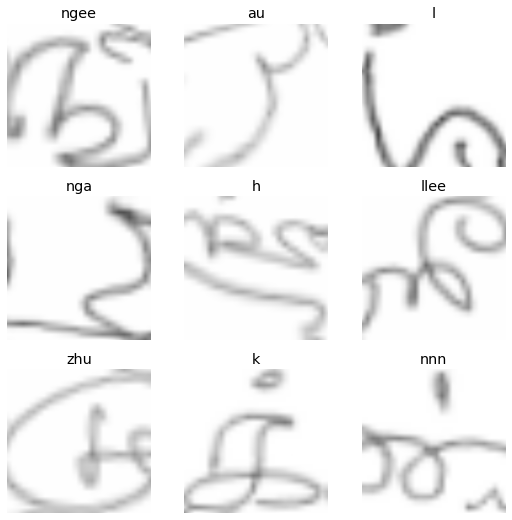

In [6]:
path = '/content/tamil_letters'

dls = db.dataloaders(path)
dls.show_batch(nrows=3, ncols=3)

# Making a baseline model

In [7]:
learn = cnn_learner(dls, resnet34, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [8]:
learn.fine_tune(25)

epoch,train_loss,valid_loss,accuracy,time
0,2.606295,1.786957,0.497317,06:44


epoch,train_loss,valid_loss,accuracy,time
0,1.375950,0.750574,0.770938,09:21
1,1.065866,0.566341,0.816099,09:20
2,0.969040,0.524782,0.823756,09:20
3,0.916894,0.490895,0.837926,09:20
4,0.888727,0.471255,0.840096,09:20
5,0.819635,0.433021,0.859029,09:20
6,0.791947,0.442911,0.847633,09:20
7,0.780878,0.410875,0.858788,09:20
8,0.776886,0.415859,0.856859,09:20
9,0.729414,0.406646,0.861923,09:19


epoch,train_loss,valid_loss,accuracy,time
0,1.375950,0.750574,0.770938,09:21
1,1.065866,0.566341,0.816099,09:20
2,0.969040,0.524782,0.823756,09:20
3,0.916894,0.490895,0.837926,09:20
4,0.888727,0.471255,0.840096,09:20
5,0.819635,0.433021,0.859029,09:20
6,0.791947,0.442911,0.847633,09:20
7,0.780878,0.410875,0.858788,09:20
8,0.776886,0.415859,0.856859,09:20
9,0.729414,0.406646,0.861923,09:19


In [9]:
learn.export()